In [ ]:
#４択にしたけど損失関数的にうまく予測しない．エッジに対しての予測性能が下がる

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import xgboost
import sys
sys.path.append("./skynet/bf/src/scripts/")
import xgboost_ohlc
import utils
import numpy as np
import seaborn as sns
import talib
import datetime
import requests
import time
%matplotlib inline

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 500)

In [38]:
hour = pd.read_csv('skynet/bf/data/processed/hour.csv')[-10000:]

In [39]:
hour['Target_Class'] = 0
hour.loc[(hour['Target_C/C'] >= hour['Target_C/C'].quantile(0.25)).values,'Target_Class'] = 1
hour.loc[(hour['Target_C/C'] >= hour['Target_C/C'].quantile(0.50)).values,'Target_Class'] = 2
hour.loc[(hour['Target_C/C'] >= hour['Target_C/C'].quantile(0.75)).values,'Target_Class'] = 3

In [41]:
data_columns = ['MACDS/O','UP','FirstUP','C/O','C-1/C','H/O','L/O']
target_column = 'Target_Class'
backtest_columns = ['timestamp','Target_Close','Target_Open','Close','Open']

hour_for_ml = hour[data_columns+[target_column]+backtest_columns].dropna()
train = hour_for_ml[-5000:-1000]
test = hour_for_ml[-1000:]
backtest = hour_for_ml[-1000:]
all_data = hour_for_ml[-5000:]

data_train = train[data_columns]
data_test = test[data_columns]


target_train = train[target_column]
target_test = test[target_column]


xgbr = xgboost_ohlc.r_fit(data_train, target_train)

predict = xgbr.predict(data_test)
p = predict >= 1.00000
result = (predict == target_test.values)
print(result.mean())

#xgbr_all_data = xgboost_ohlc.r_fit(all_data[data_columns],all_data[target_column])
xgbr_all_data = xgbr
version = '1100'
train.to_csv("skynet/bf/model/T_"+version+"/train.csv")
test.to_csv("skynet/bf/model/T_"+version+"/test.csv")
backtest.to_csv("skynet/bf/model/T_"+version+"/backtest.csv")
pickle.dump(xgbr_all_data, open("skynet/bf/model/T_"+version+"/xgbr.pickle", "wb"))
with open("skynet/bf/model/T_"+version+"/spec.txt", mode="w") as txt:
    txt.write(str(datetime.datetime.now())+'\n')
    txt.write('data_columns: '+str(data_columns)+"\n")
    txt.write('target_column: '+str(target_column)+"\n")
    txt.write('simplescore: '+str(result.mean())+"\n")

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.8s finished


0.0


In [45]:
target_test.value_counts()

2    323
1    306
3    196
0    175
Name: Target_Class, dtype: int64

In [42]:
predict

array([1.6683875 , 1.2364788 , 1.3216243 , 1.5063554 , 1.3351175 ,
       1.4476922 , 1.7936889 , 1.2029738 , 0.86966074, 1.8925687 ,
       1.1825945 , 1.5180506 , 2.060597  , 1.3142312 , 1.6659741 ,
       1.347668  , 1.3862206 , 1.568697  , 1.4000337 , 1.8631675 ,
       1.1774756 , 1.6691548 , 1.318032  , 1.250659  , 1.9162202 ,
       1.5016713 , 1.8492866 , 1.4244826 , 1.5676218 , 1.3359127 ,
       1.3492308 , 1.4074721 , 1.5583261 , 1.3498678 , 1.2069695 ,
       1.5388898 , 1.3495724 , 1.6638316 , 1.6089731 , 1.5271939 ,
       1.623881  , 0.6617117 , 1.7258373 , 1.2417519 , 1.4845399 ,
       1.6689048 , 1.5085508 , 1.401193  , 1.2616976 , 1.6538858 ,
       1.5503553 , 2.1524715 , 1.9953605 , 1.6821531 , 1.369713  ,
       1.274224  , 0.9458176 , 1.9173734 , 1.5258427 , 1.8840185 ,
       1.851355  , 1.5465513 , 1.3346174 , 1.4879496 , 1.6996768 ,
       1.4145437 , 1.5243124 , 1.2674932 , 1.3508979 , 1.053669  ,
       1.4947526 , 1.2897787 , 1.7469527 , 0.99612176, 1.66518

In [51]:
for i,x in enumerate(predict.round()):
    if x == 0:
        print(i)
    if x == 3:
        print(i,'3')

345 3
369
420 3
573
593
668 3
893
894 3
937


In [52]:
len(predict)

1000

In [49]:
np.unique(predict.round(),return_counts=True)

(array([0., 1., 2., 3.], dtype=float32), array([  5, 456, 535,   4]))

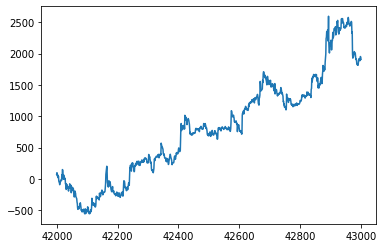

In [3]:
plt.plot((0.01*(p*2-1)*(backtest['Target_Close']-backtest['Target_Open'])-1).cumsum())

In [52]:
#########################################
#########################################
#########################################

In [36]:
target_test.value_counts()

2    323
1    306
3    196
0    175
Name: Target_Class, dtype: int64